In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

In [11]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .05
mpl.rcParams['figure.subplot.top']    = .95
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .8
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,4


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [12]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

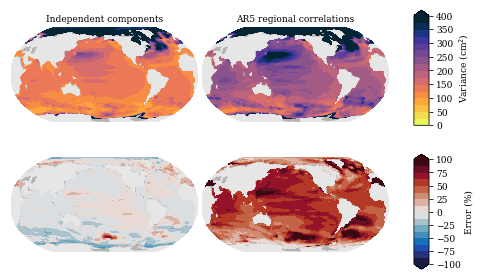

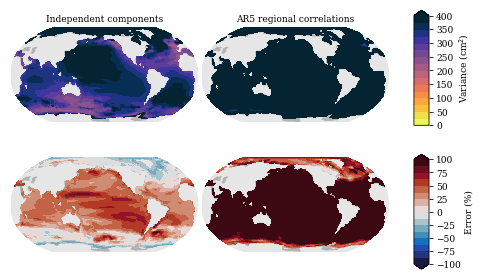

In [14]:
vmax = 400
vmax2 = 100
cmap = plt.get_cmap('cmo.thermal_r',16)
cmap2 = plt.get_cmap('cmo.balance',16)

for s,scen in enumerate(['rcp45','rcp85']):
    with xr.open_dataset(f'../data/totvar_comp_{scen}.nc') as ds:
        stdn = ds['stdn'].values
        glac = ds['glac'].values
        gsmb = ds['gsmb'].values
        asmb = ds['asmb'].values
        adyn = ds['adyn'].values
        gdyn = ds['gdyn'].values
        lws  = ds['lws'].values
        gia  = ds['gia'].values
        
        rsl = ds['rsl'].values
        lon = ds['lon'].values
        lat = ds['lat'].values

    indep = stdn+glac+gsmb+asmb+adyn+gdyn+lws+gia
    ar5   = (np.sqrt(stdn)+np.sqrt(gsmb)+np.sqrt(asmb))**2 + glac+adyn+gdyn+lws+gia
    
    fig = plt.figure()
    
    ax = fig.add_subplot(2,2,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,indep,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('Independent components')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,2,2,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,ar5,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('AR5 regional correlations')
    makeglobal(ax)
    
    cax = fig.add_axes([.85,.55,.03,.4])
    cb = plt.colorbar(im,cax=cax,extend='max')
    cb.set_label('Variance (cm$^2$)')    
    
    ax = fig.add_subplot(2,2,3,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,100*(indep-rsl)/rsl,transform=ccrs.PlateCarree(),vmin=-vmax2,vmax=vmax2,cmap=cmap2)
    makeglobal(ax)
    
    ax = fig.add_subplot(2,2,4,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,100*(ar5-rsl)/rsl,transform=ccrs.PlateCarree(),vmin=-vmax2,vmax=vmax2,cmap=cmap2)
    makeglobal(ax)

    cax = fig.add_axes([.85,.05,.03,.4])
    cb = plt.colorbar(im,cax=cax,extend='both')
    cb.set_label('Error (%)')    
    
    figname = f'draftplot_totvar_error_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()     